In [3]:
library(arm)
library(Matching)
data(lalonde)

Loading required package: MASS

Loading required package: Matrix

Loading required package: lme4


arm (Version 1.12-2, built: 2021-10-15)


Working directory is /Users/hayounglim/Desktop/CS130


## 
##  Matching (Version 4.9-11, Build Date: 2021-10-18)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##




In [4]:
# splitting the data into a training set (80% random split) and a test set(20%)

rows <- sample(nrow(lalonde))
shuffled_lalonde <- lalonde[rows, ]
split <- round(nrow(lalonde) * 0.80)
train <- shuffled_lalonde[1:split, ]
test <- shuffled_lalonde[(split + 1):nrow(lalonde), ]

In [598]:
# Building two models that incorporate at least 6 predictors + "treat" and "nodegr"
# Model 2 includes an interaction term between "treat" and "nodegr"

lm1 <- lm(re78 ~ age+black+hisp+married+nodegr+re74+re75+u74+u75+treat, data=train)
lm2 <- lm(re78 ~ age+black+hisp+married+re74+re75+u74+u75+treat*nodegr, data=train)

In [599]:
summary(lm1)


Call:
lm(formula = re78 ~ age + black + hisp + married + nodegr + re74 + 
    re75 + u74 + u75 + treat, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -8917  -4573  -1632   2999  53544 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  6.334e+03  2.136e+03   2.965  0.00324 **
age          6.615e+01  5.234e+01   1.264  0.20713   
black       -2.023e+03  1.347e+03  -1.502  0.13395   
hisp        -4.358e+01  1.773e+03  -0.025  0.98040   
married     -7.686e+02  1.028e+03  -0.748  0.45526   
nodegr      -1.038e+03  8.932e+02  -1.163  0.24579   
re74         1.534e-02  1.019e-01   0.151  0.88040   
re75        -2.317e-02  1.710e-01  -0.136  0.89228   
u74          2.285e+02  1.395e+03   0.164  0.86997   
u75         -1.136e+03  1.214e+03  -0.935  0.35033   
treat        1.441e+03  7.370e+02   1.956  0.05132 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6701 on 345 degrees of freedom
Multiple R

In [600]:
summary(lm2)


Call:
lm(formula = re78 ~ age + black + hisp + married + re74 + re75 + 
    u74 + u75 + treat * nodegr, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9257  -4580  -1658   2943  53607 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   5.765e+03  2.312e+03   2.493   0.0131 *
age           6.567e+01  5.239e+01   1.253   0.2109  
black        -1.980e+03  1.350e+03  -1.467   0.1434  
hisp         -3.818e+01  1.774e+03  -0.022   0.9828  
married      -7.095e+02  1.033e+03  -0.687   0.4927  
re74          1.429e-02  1.020e-01   0.140   0.8886  
re75         -2.095e-02  1.711e-01  -0.122   0.9027  
u74           3.440e+02  1.407e+03   0.244   0.8070  
u75          -1.244e+03  1.227e+03  -1.014   0.3113  
treat         2.312e+03  1.535e+03   1.506   0.1330  
nodegr       -4.113e+02  1.319e+03  -0.312   0.7553  
treat:nodegr -1.141e+03  1.764e+03  -0.647   0.5182  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual sta

In [601]:
# Mean squared error for Model 1

mean((test$re78 - predict(lm1, test)) ^ 2)

[1] 35724485

In [602]:
# Mean squarred error for Model 2

mean((test$re78 - predict(lm2, test)) ^ 2)

[1] 35173574

In [603]:
sim.glm <- sim(lm1, 1000)

In [604]:
# Simulation for the typical trainee WITH treatment and WITH high school degree (Model 1)

storage1.vector = rep(0, 1000)
for (i in 1:1000) {
  storage1.vector[i] <- sim.glm@coef[i,1] + 
                       sim.glm@coef[i,2]*25.37 + 
                       sim.glm@coef[i,3]*1 + 
                       sim.glm@coef[i,4]*0 + 
                       sim.glm@coef[i,5]*0 + 
                       sim.glm@coef[i,6]*0 + 
                       sim.glm@coef[i,7]*0 + 
                       sim.glm@coef[i,8]*0 + 
                       sim.glm@coef[i,9]*0 + 
                       sim.glm@coef[i,10]*0 + 
                       sim.glm@coef[i,11]*1 +
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [605]:
quantile(storage1.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-6475.958 21311.419

In [606]:
# Simulation for the typical trainee WITHOUT treatment and WITH high school degrees (Model 1)

storage2.vector = rep(0, 1000)
for (i in 1:1000) {
  storage2.vector[i] <- sim.glm@coef[i,1] + 
                       sim.glm@coef[i,2]*25.37 + 
                       sim.glm@coef[i,3]*1 + 
                       sim.glm@coef[i,4]*0 + 
                       sim.glm@coef[i,5]*0 + 
                       sim.glm@coef[i,6]*0 + 
                       sim.glm@coef[i,7]*0 + 
                       sim.glm@coef[i,8]*0 + 
                       sim.glm@coef[i,9]*0 + 
                       sim.glm@coef[i,10]*0 + 
                       sim.glm@coef[i,11]*0 + 
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [607]:
quantile(storage2.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-6635.565 20221.969

In [608]:
# Simulation for the typical trainee WITH treatment and WITHOUT high school degrees (Model 1)

storage3.vector = rep(0, 1000)
for (i in 1:1000) {
  storage3.vector[i] <- sim.glm@coef[i,1] + 
                       sim.glm@coef[i,2]*25.37 + 
                       sim.glm@coef[i,3]*1 + 
                       sim.glm@coef[i,4]*0 + 
                       sim.glm@coef[i,5]*0 + 
                       sim.glm@coef[i,6]*0 + 
                       sim.glm@coef[i,7]*0 + 
                       sim.glm@coef[i,8]*0 + 
                       sim.glm@coef[i,9]*0 + 
                       sim.glm@coef[i,10]*0 + 
                       sim.glm@coef[i,11]*1 + 
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [609]:
quantile(storage3.vector, probs = c(0.025, 0.975))

2.5%    97.5% 
-5510.86 19722.07

In [610]:
# Simulation for the typical trainee WITHOUT treatment and WITHOUT high school degrees (Model 1)

storage4.vector = rep(0, 1000)
for (i in 1:1000) {
  storage4.vector[i] <- sim.glm@coef[i,1] + 
                       sim.glm@coef[i,2]*25.37 + 
                       sim.glm@coef[i,3]*1 + 
                       sim.glm@coef[i,4]*0 + 
                       sim.glm@coef[i,5]*0 + 
                       sim.glm@coef[i,6]*1 + 
                       sim.glm@coef[i,7]*0 + 
                       sim.glm@coef[i,8]*0 + 
                       sim.glm@coef[i,9]*0 + 
                       sim.glm@coef[i,10]*0 + 
                       sim.glm@coef[i,11]*0 + 
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [611]:
quantile(storage4.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-9484.028 18000.437

In [612]:
sim2.glm <- sim(lm2, 1000)

In [613]:
# Simulation for the typical trainee WITH treatment and WITH high school degree (Model 2)

storage5.vector = rep(0, 1000)
for (i in 1:1000) {
  storage5.vector[i] <- sim2.glm@coef[i,1] + 
                       sim2.glm@coef[i,2]*25.37 + 
                       sim2.glm@coef[i,3]*1 + 
                       sim2.glm@coef[i,4]*0 + 
                       sim2.glm@coef[i,5]*0 + 
                       sim2.glm@coef[i,6]*1 + 
                       sim2.glm@coef[i,7]*0 + 
                       sim2.glm@coef[i,8]*1 + 
                       sim2.glm@coef[i,9]*1 + 
                       sim2.glm@coef[i,10]*1 + 
                       sim2.glm@coef[i,11]*0 +
                       sim2.glm@coef[i,12]*1 +
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [614]:
quantile(storage5.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-7058.878 19081.742

In [615]:
# Simulation for the typical trainee WITH treatment and WITH high school degree (Model 2)

storage6.vector = rep(0, 1000)
for (i in 1:1000) {
  storage6.vector[i] <- sim2.glm@coef[i,1] + 
                       sim2.glm@coef[i,2]*25.37 + 
                       sim2.glm@coef[i,3]*1 + 
                       sim2.glm@coef[i,4]*0 + 
                       sim2.glm@coef[i,5]*0 + 
                       sim2.glm@coef[i,6]*0 + 
                       sim2.glm@coef[i,7]*0 + 
                       sim2.glm@coef[i,8]*1 + 
                       sim2.glm@coef[i,9]*1 + 
                       sim2.glm@coef[i,10]*0 + 
                       sim2.glm@coef[i,11]*0 +
                       sim2.glm@coef[i,12]*0 +
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [616]:
quantile(storage6.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-7372.564 18178.791

In [617]:
# Simulation for the typical trainee WITH treatment and WITHOUT high school degree (Model 2)

storage7.vector = rep(0, 1000)
for (i in 1:1000) {
  storage7.vector[i] <- sim2.glm@coef[i,1] + 
                       sim2.glm@coef[i,2]*25.37 + 
                       sim2.glm@coef[i,3]*1 + 
                       sim2.glm@coef[i,4]*0 + 
                       sim2.glm@coef[i,5]*0 + 
                       sim2.glm@coef[i,6]*0 + 
                       sim2.glm@coef[i,7]*0 + 
                       sim2.glm@coef[i,8]*1 + 
                       sim2.glm@coef[i,9]*1 + 
                       sim2.glm@coef[i,10]*1 + 
                       sim2.glm@coef[i,11]*1 +
                       sim2.glm@coef[i,12]*0 +
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [618]:
quantile(storage7.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-7048.715 20238.487

In [619]:
# Simulation for the typical trainee WITHOUT treatment and WITHOUT high school degree (Model 2)

storage8.vector = rep(0, 1000)
for (i in 1:1000) {
  storage8.vector[i] <- sim2.glm@coef[i,1] + 
                       sim2.glm@coef[i,2]*25.37 + 
                       sim2.glm@coef[i,3]*1 + 
                       sim2.glm@coef[i,4]*0 + 
                       sim2.glm@coef[i,5]*0 + 
                       sim2.glm@coef[i,6]*0 + 
                       sim2.glm@coef[i,7]*0 + 
                       sim2.glm@coef[i,8]*1 + 
                       sim2.glm@coef[i,9]*1 + 
                       sim2.glm@coef[i,10]*0 + 
                       sim2.glm@coef[i,11]*1 +
                       sim2.glm@coef[i,12]*0 +
                       rnorm(1, mean = 0, sd = sim.glm@sigma[i]) # simulate error/noise
}

In [620]:
quantile(storage8.vector, probs = c(0.025, 0.975))

2.5%     97.5% 
-9876.817 18540.089

In [621]:
# Apply regression tree method to build a predictive model

library(tree)

In [622]:
tree.re78 <- tree(re78 ~ age+black+hisp+married+nodegr+re74+re75+u74+u75+treat, data=train)
summary(tree.re78)


Regression tree:
tree(formula = re78 ~ age + black + hisp + married + nodegr + 
    re74 + re75 + u74 + u75 + treat, data = train)
Variables actually used in tree construction:
[1] "treat"  "re74"   "age"    "re75"   "nodegr"
Number of terminal nodes:  7 
Residual mean deviance:  40270000 = 1.406e+10 / 349 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -17970   -4050   -1179       0    2996   42340 

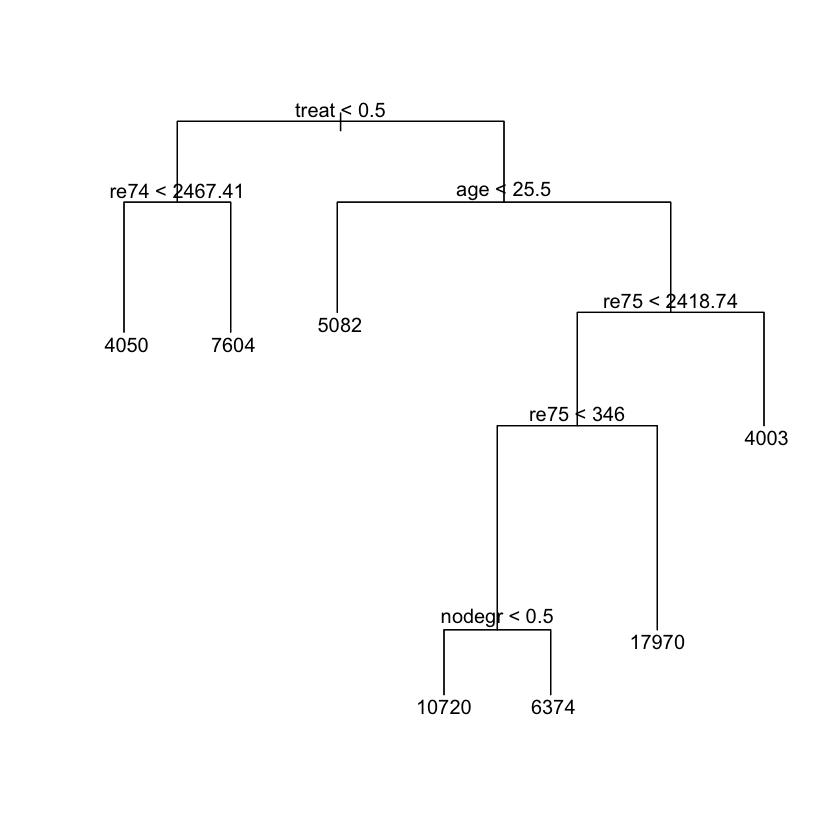

In [623]:
plot(tree.re78)
text(tree.re78, pretty=0)

In [624]:
# Calculate MSE for the original tree

test.pred.1 <- predict(tree.re78, test, type="vector")
residuals_regression <- test$re78 - test.pred.1
MSE_regression <- mean(residuals_regression^2)
MSE_regression

[1] 46223776

In [625]:
# Perform cross-validation for tree pruning

cv.re78 <- cv.tree(tree.re78, FUN = prune.tree) 
cv.re78

$size
[1] 7 6 1

$dev
[1] 19051885870 18796492470 18042120254

$k
[1]      -Inf 194708402 382982683

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

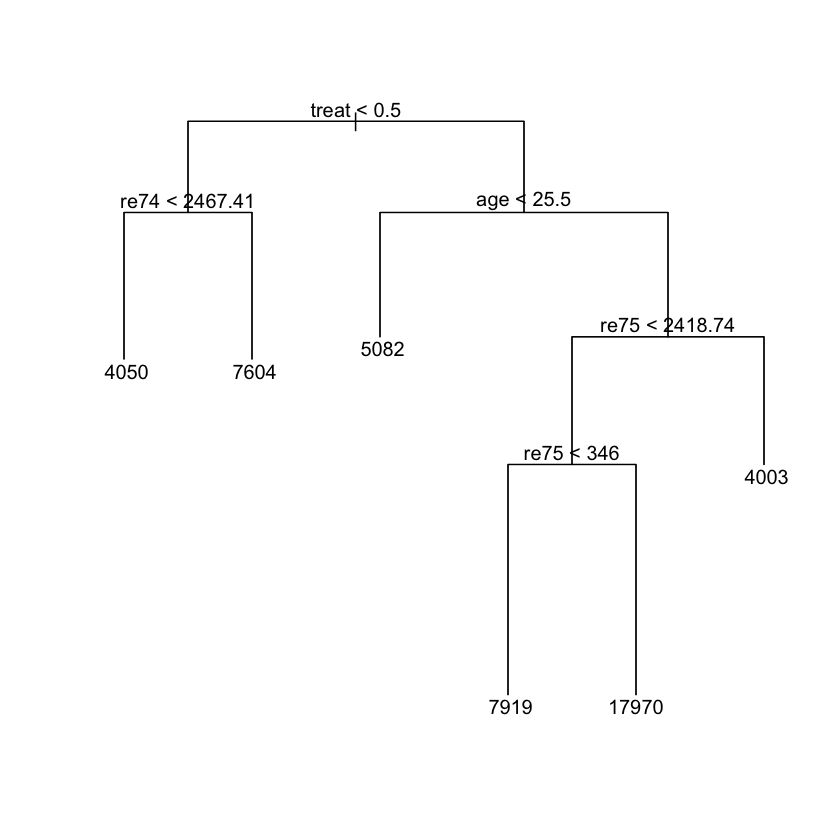

In [626]:
# Prune the tree according to optimal size

prune.re78 <- prune.tree(tree.re78, best = 2)
plot(prune.re78)
text(prune.re78, pretty = 0)

In [627]:
# Calculate MSE for the pruned tree

test.pred.2 <- predict(prune.re78, test, type="vector")
residuals_regression <- test$re78 - test.pred.2
MSE_regression <- mean(residuals_regression^2)
MSE_regression

[1] 46355192

In [628]:
# Calculate expected value for the typical trainee WITH treatment and WITH high school degree

age <- c(25.37)
black <- c(1)
hisp <- c(0)
married <- c(0)
re74 <- c(0)
re75 <- c(0)
u74 <- c(1)
u75 <- c(1)
nodegr <- c(0)
treat <- c(1)

typical.degree.treat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(prune.re78, newdata=typical.degree.treat)


1 
5081.515

In [629]:
# Calculate expected value for the typical trainee WITHOUT treatment and WITH high school degree

nodegr <- c(0)
treat <- c(0)

typical.degree.notreat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(prune.re78, newdata=typical.degree.notreat)

1 
4050.023

In [630]:
# Calculate expected value for the typical trainee WITH treatment and WITHOUT high school degree

nodegr <- c(1)
treat <- c(1)

typical.nodegree.treat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(prune.re78, newdata=typical.degree.treat)

1 
5081.515

In [631]:
# Calculate expected value for the typical trainee WITHOUT treatment and WITHOUT high school degree

nodegr <- c(1)
treat <- c(0)

typical.nodegree.notreat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(prune.re78, newdata=typical.degree.notreat)

1 
4050.023

In [632]:
library(randomForest)

mtry = 3  OOB error = 49706198 
Searching left ...
mtry = 2 	OOB error = 47696649 
0.04042854 0.05 
Searching right ...
mtry = 6 	OOB error = 51738869 
-0.04089371 0.05 


,mtry,OOBError
2,2,47696649
3,3,49706198
6,6,51738869


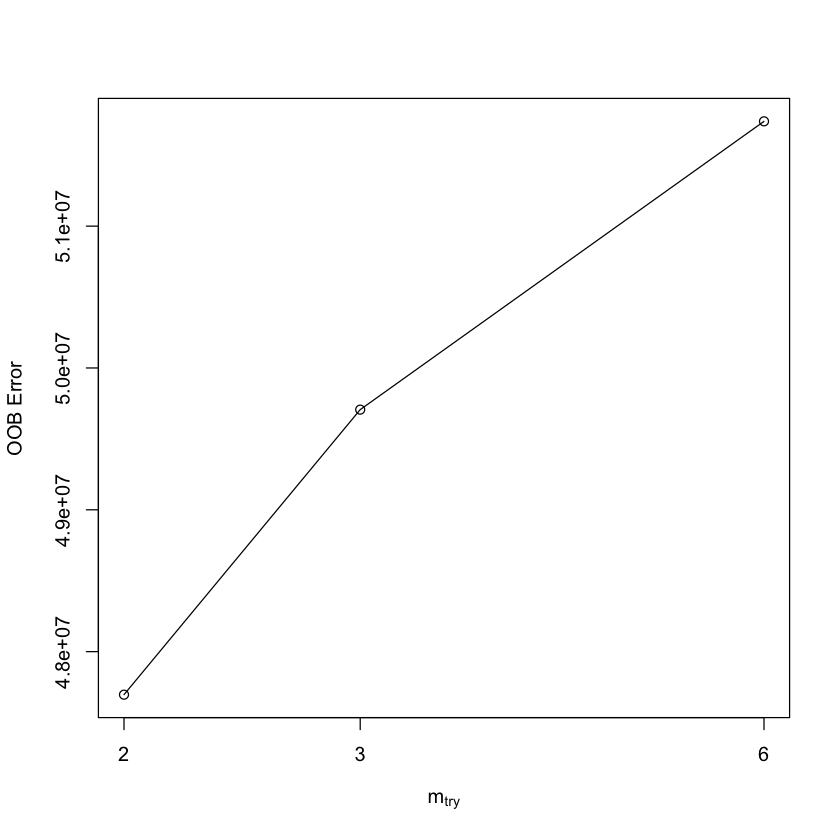

In [633]:
# Calculate the best value for mtry that minimizes OOB error using tuneRF function

tuneRF(train[,-9], train[,9])

In [634]:
# Apply random forest method to build a predictive model

rf.lalonde <- randomForest(re78 ~ age+black+hisp+married+nodegr+re74+re75+u74+u75+treat, data=train, mtry=2, importance=TRUE)
rf.lalonde


Call:
 randomForest(formula = re78 ~ age + black + hisp + married +      nodegr + re74 + re75 + u74 + u75 + treat, data = train, mtry = 2,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 46391709
                    % Var explained: -2.17

In [635]:
importance(rf.lalonde)

,%IncMSE,IncNodePurity
age,1.282257,1471090044
black,3.865856,295400853
hisp,1.798632,149532586
married,3.875657,196103053
nodegr,-1.355132,338680288
re74,6.526925,856804129
re75,8.446017,1662599876
u74,6.236466,225106395
u75,4.020594,185064646
treat,1.440799,475371647


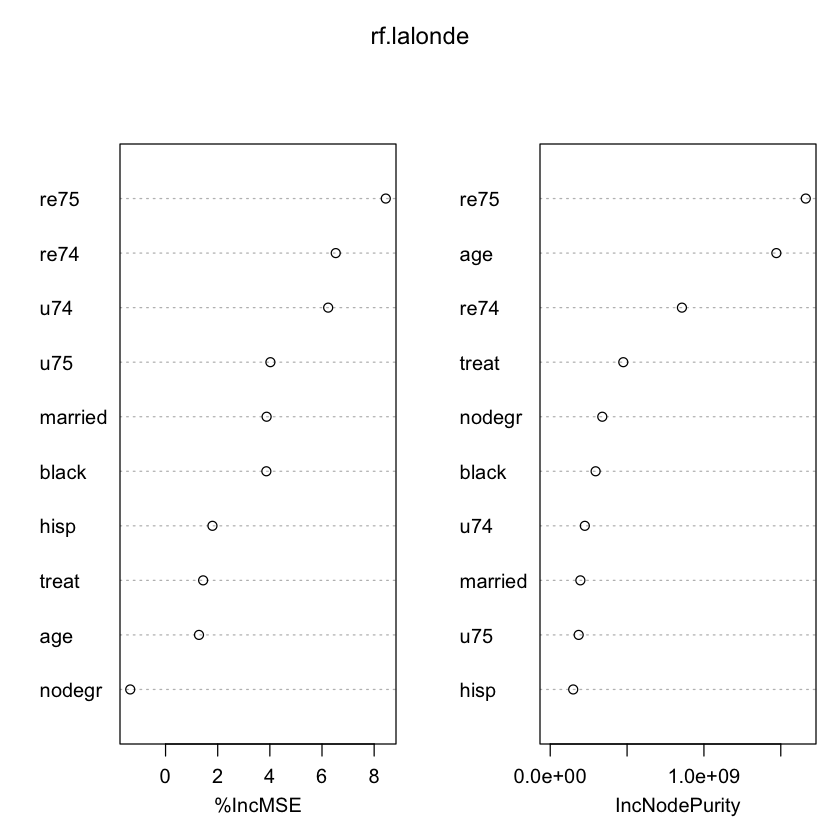

In [636]:
varImpPlot(rf.lalonde)

In [637]:
rf.test.pred <- predict(rf.lalonde, newdata=test)

In [638]:
mse.rf.test <- mean((test$re78 - rf.test.pred)^2)
mse.rf.test

[1] 37998338

In [639]:
# Calculate expected value for the typical trainee WITH treatment and WITH high school degree

age <- c(25.37)
black <- c(1)
hisp <- c(0)
married <- c(0)
re74 <- c(0)
re75 <- c(0)
u74 <- c(1)
u75 <- c(1)
nodegr <- c(0)
treat <- c(1)

typical.degree.treat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(rf.lalonde, newdata=typical.degree.treat)

1 
6384.045

In [640]:
# Calculate expected value for the typical trainee WITHOUT treatment and WITH high school degree


nodegr <- c(0)
treat <- c(0)

typical.degree.notreat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(rf.lalonde, newdata=typical.degree.notreat)

1 
4279.769

In [641]:
# Calculate expected value for the typical trainee WITH treatment and WITHOUT high school degree


nodegr <- c(1)
treat <- c(1)

typical.nodegree.treat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(rf.lalonde, newdata=typical.degree.treat)

1 
6384.045

In [642]:
# Calculate expected value for the typical trainee WITHOUT treatment and WITHOUT high school degree


nodegr <- c(1)
treat <- c(0)

typical.nodegree.notreat <- data.frame(age, black, hisp, married, re74, re75, u74, u75, nodegr, treat)
predict(rf.lalonde, newdata=typical.degree.notreat)

1 
4279.769

In [5]:
train


,age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,treat
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
80,22,11,1,0,0,1,0.00,0.0000,6456.70,1,1,1
254,27,11,1,0,0,1,0.00,0.0000,11197.30,1,1,0
221,35,11,1,0,0,1,0.00,0.0000,0.00,1,1,0
189,18,9,1,0,0,1,0.00,0.0000,10740.10,1,1,0
280,27,13,1,0,0,0,0.00,0.0000,7609.52,1,1,0
202,24,10,1,0,0,1,0.00,0.0000,7618.64,1,1,0
366,24,12,1,0,0,0,0.00,159.8850,0.00,1,0,0
270,50,10,0,1,0,1,0.00,0.0000,0.00,1,1,0
8,32,11,1,0,0,1,0.00,0.0000,8472.16,1,1,1
